<a href="https://colab.research.google.com/github/Shilajit-CR7/ML-Works/blob/main/Chemical_Classifier_(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
X_Train = pd.read_csv('Logistic_X_Train.csv')
Y_Train = pd.read_csv('Logistic_Y_Train.csv')

In [7]:
X_Train.isnull().sum()

f1    0
f2    0
f3    0
dtype: int64

In [8]:
X_Test = pd.read_csv('Logistic_X_Test.csv')

In [19]:
X_Test.describe()

,f1,f2,f3
count,1000.000000,1000.000000,1000.000000
mean,-0.014883,1.016569,0.006503
std,1.304388,1.016736,1.181370
min,-2.749291,-1.551607,-2.746325
25%,-1.037437,0.321788,-0.993445
50%,-0.176686,0.989418,0.201337
75%,1.006201,1.706761,0.979945
max,3.815899,4.296456,2.584702


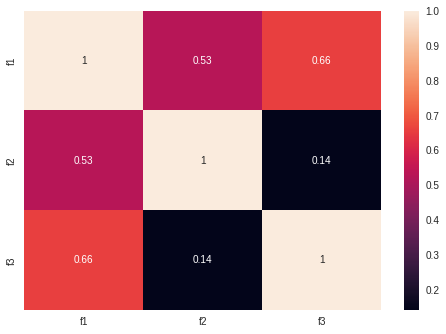

In [26]:
plt.style.use('seaborn')
corr_matrix = X_Test.corr()
sns.heatmap(corr_matrix,annot = True)
plt.show()

In [29]:
df = pd.concat([X_Train,Y_Train],axis = 'columns')

In [30]:
df

,f1,f2,f3,label
0,-1.239375,0.749101,-0.528515,1
1,-1.036070,0.801436,-1.283712,1
2,-0.615579,1.579521,-1.391927,1
3,1.335978,1.348651,1.433564,0
4,0.658925,1.300019,0.571603,0
...,...,...,...,...
2995,-0.455628,1.302303,-1.338027,1
2996,-0.434551,1.597813,-1.748643,1
2997,0.088277,1.638789,-2.193641,1
2998,1.525155,0.859234,1.505308,0


In [31]:
c1 = df[df['label']==1]
c2 = df[df['label']==0]

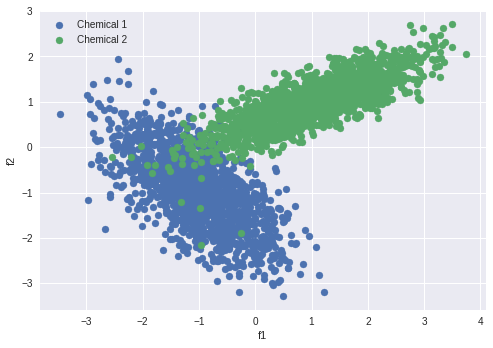

In [36]:
plt.scatter(c1['f1'],c1['f3'],label = 'Chemical 1')
plt.scatter(c2['f1'],c2['f3'],label = 'Chemical 2')
plt.legend()
plt.xlabel('f1')
plt.ylabel('f2')
plt.show()

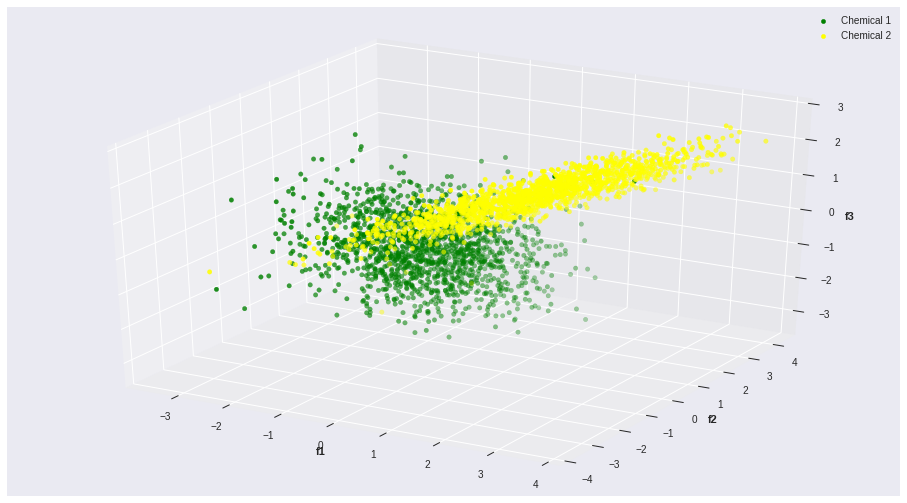

In [49]:
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
ax.scatter3D(c1['f1'], c1['f2'], c1['f3'], color = "green",label='Chemical 1')
ax.scatter3D(c2['f1'], c2['f2'], c2['f3'], color = "yellow",label = 'Chemical 2')
plt.legend()
ax.set_xlabel('f1', fontweight ='bold')
ax.set_ylabel('f2', fontweight ='bold')
ax.set_zlabel('f3', fontweight ='bold')
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [10]:
lr.fit(X_Train,Y_Train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [12]:
y_pred = lr.predict(X_Test)

In [14]:
y_pred = pd.DataFrame(y_pred)

In [16]:
y_pred.columns = ['label']
y_pred.head()

,label
0,1
1,1
2,0
3,1
4,1


In [18]:
y_pred.to_csv('submission.csv',index = False)